# Récursions multiples

## Exemple: Recherche d'un élément dans une liste

*Problème*: Trouver si un nombre appartient ou non à une liste. 

On renvoie `True` si c'est le cas `False` autrement.

**Cas de base**: la liste ne contient qu'un nombre, il suffit alors de le comparer avec celui qu'on cherche.

**Partage**: la liste initiale $L$ est découpée en deux listes $L_g$ et $L_d$ de tailles égales ou presque. Si $n$ est le nombre d'éléments de la liste et $m$ est le résultat de la division entière de $n$ par $2$:
- $L_g=T[1\dots m]$ (en python cela donne `Lg = L[:m]`)
- $L_d=T[(m+1)\dots n]$ (en python `Ld = L[m:]`)

*Note*: en algorithmique, l'index du premier élément est souvent noté 1. Il faut donc être vigilent lors de la traduction vers un langage particulier comme Python.

**Récursion**: On appelle récursivement la fonction sur $T_g$ puis sur $T_d$; si l'un de ces appels récursifs renvoie `True`, on renvoie `True`; sinon on renvoie `False`. 

In [ ]:
def recherche(nb, nbs):
    # cas de base
    if len(nbs) == 1: 
        return nb == nbs[0]
    
    # découpage
    m = len(nbs)//2
    nbs_g, nbs_d = nbs[:m], nbs[m:]
    # résolution récursive
    a_gauche = recherche(nb, nbs_g)
    a_droite = recherche(nb, nbs_d)
    # combinaison
    res = a_gauche or a_droite
    return res

recherche(23, [0, 5, 15, 20, 25])

ou de façon plus concise:

In [ ]:
def recherche(nb, nbs):
    if len(nbs) == 1: return nb == nbs[0] # cas de base
    m = len(nbs)//2 # découpage
    return recherche(nb, nbs[:m]) or recherche(nb, nbs[m:])
  
recherche(5, [3, 1, 7, 5, 10])

Voir dans [Python Tutor](http://pythontutor.com/visualize.html#code=def%20recherche%28nb,%20nbs%29%3A%0A%20%20%20%20if%20len%28nbs%29%20%3D%3D%201%3A%20return%20nb%20%3D%3D%20nbs%5B0%5D%0A%20%20%20%20m%20%3D%20len%28nbs%29%20//%202%0A%20%20%20%20return%20recherche%28nb,%20nbs%5B%3Am%5D%29%20or%20recherche%28nb,%20nbs%5Bm%3A%5D%29%0A%20%20%0Arecherche%285,%20%5B3,%201,%207,%205,%2010%5D%29&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

### Illustration: arbre des appels

On peut tracer un arbre qui précise les différents **appels** (flèches noires) et **retours** (flèches rouges); les petits numéros indiquent l'ordre de ces événements:

<center>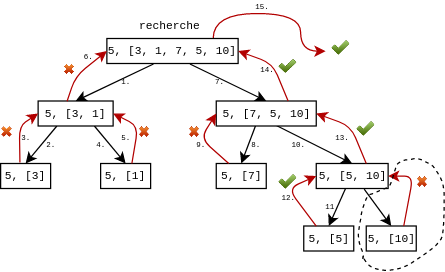</center>

### Note: opérateurs «court-circuits» `and` et `or`

L'appel entouré en pointillé n'a en fait pas lieu. Cela vient du comportement «court-circuit» ou «fainéant» des opérateurs logiques `and` et `or`. 

En effet, **dans** `recherche(5, [5, 10])`, lors de l'évaluation de:
    
    recherche(5, [5]) or recherche(5, [10])
                 
                 «de la forme»
                
                expr1 or expr2

si `expr1` vaut `True`, l'expression `expr1 or expr2` vaudra `True` ***quel que soit*** la valeur de `expr2`. Pour cette raison `expr2` n'est *pas évaluée dans ce cas* (comportement «fainéant»).

Comme ici, `recherche(5, [5])` vaut évidemment `True`,  `recherche(5, [10])` n'est **pas évaluée**. Vérifier par vous-même:

In [ ]:
def test():
    print("--> appel de test")
    return True

False or test() # exécuter puis remplacer `False` par `True`

De même, dans `expr1 and expr2`, si `expr1` vaut `False`, alors `expr2` n'est pas évaluée et le résultat est `False`.

### Visualiser les appels et retours

In [ ]:
def recherche_voir(nb, nbs, n=0):
    dec = "  " * n
    print(f"{dec}appel recherche({nb}, {nbs})")
    # cas de base
    if len(nbs) == 1:
        print(f"{dec}retour recherche({nb}, {nbs}): -> {nb == nbs[0]}")
        return nb == nbs[0]
    
    # découpage
    m = len(nbs)//2
    g = recherche_voir(nb, nbs[:m], n+1)
    res = g or recherche_voir(nb, nbs[m:], n+1)
    print(f"{dec}retour recherche({nb}, {nbs}): -> {res}")
    return res

recherche_voir(5, [3, 1, 7, 5, 10])

## Exercices

### Exercice 1 - Recherche dichotomique

Adapter la fonction `recherche` afin de fournir une *implémentation récursive* de la **recherche dichotomique** dans un tableau trié. 

La fonction renvoie `True` ou `False` selon que la valeur recherchée se trouve ou non dans le tableau.

In [ ]:
def recherche_dicho(nb, nbs):
    # votre code ici

**Solution**

In [ ]:
def recherche_dicho(nb, nbs):
    N = len(nbs)
    if N == 1:
        return nb == nbs[0]
    m = N // 2
    if nb < nbs[m]:
        return recherche_dicho(nb, nbs[:m])
    elif nb > nbs[m]:
        return recherche_dicho(nb, nbs[m+1:])
    else:
        return True
    
assert recherche_dicho(5, [1, 3, 4, 6, 12, 13, 15, 100, 1000, 1001]) == False
assert recherche_dicho(5, [1, 3, 5, 6, 12, 13, 15, 100, 1000]) == True

Ajouter du code pour visualiser les appels et les retours

In [ ]:
def recherche_dicho_voir(nb, nbs, n=0):
    # votre code ici

**Solution**

In [ ]:
def recherche_dicho_voir(nb, nbs, n=0):
    dec = "  " * n
    print(f"{dec}appel de recherche_dicho({nb}, {nbs})")
    N = len(nbs)
    if N == 1:
        print(f"{dec}retour de recherche_dicho({nb}, {nbs}) -> {nbs == nbs[0]}")
        return nb == nbs[0]
    m = N // 2
    if nb < nbs[m]:
        res = recherche_dicho_voir(nb, nbs[:m], n+1)
        print(f"{dec}retour de recherche_dicho({nb}, {nbs}) -> {res}")
        return res
    elif nb > nbs[m]:
        res = recherche_dicho_voir(nb, nbs[m+1:], n+1)
        print(f"{dec}retour de recherche_dicho({nb}, {nbs}) -> {res}")
        return res
    else:
        print(f"{dec}retour de recherche_dicho({nb}, {nbs}) -> {True}")
        return True
    
assert recherche_dicho_voir(5, [1, 3, 4, 6, 12, 13, 15, 100, 1000, 1001]) == False
print()
assert recherche_dicho_voir(5, [1, 3, 5, 6, 12, 13, 15, 100, 1000]) == True

***

### Exercice 2 - Tri fusion

En première sont abordées les algorithmes de **tris** par **sélection** et de **tri** par **insertion**. (voir *0_Term_Cours_Et_Exercices/0_cours_premiere/07_algorithmique/3_tris_selection_et_insertion.ipynb*)

Leur complexité est $O(n^2)$ ce qui veut dire que, pour un tableau de taille $n$, le temps qu'il mettrons pour réaliser le tri sera *proportionnel au carré de la taille du tableau d'entrée*.

Nous abordons ici un nouvel algorithme de tri, le **tri fusion**, dont la complexité est $O(n\log n)$ (quasi-linéaire).

Ce tri procède *récursivement* selon la méthodologie **diviser-régner**.

Lors de la **phase de descente**, il partage *récursivement* le tableau donné en entrée en deux tableaux de tailles voisines jusqu'à obtenir des tableaux de taille 1 (triés par définition).

Arrivé à ce point, lors de la **phase de remontée**, il **fusionne** les tableaux deux à deux pour produire un nouveau tableau trié.

L'opération de **fusion** de deux tableaux triés prend en entrée deux tableaux *triés* et renvoie un nouveau tableau *triés* formés des éléments des deux donnés. Il est donné ci-après:

In [ ]:
def fusionner(nbs1, nbs2):
    nbs = []
    i, j, N1, N2 = 0, 0, len(nbs1), len(nbs2)
    while i < N1 and j < N2:
        nb1, nb2 = nbs1[i], nbs2[j]
        if nb1 < nb2:
            nbs.append(nb1)
            i += 1
        else:
            nbs.append(nb2)
            j += 1
    if i == N1:
        nbs.extend(nbs2[j:])
    else:
        nbs.extend(nbs1[i:])
    return nbs

In [ ]:
assert fusionner([3], [2, 5]) == [2, 3, 5]

Voici une illustration du tri fusion sur le tableau exemple `[3, 2, 6, 1, 7]`

<center>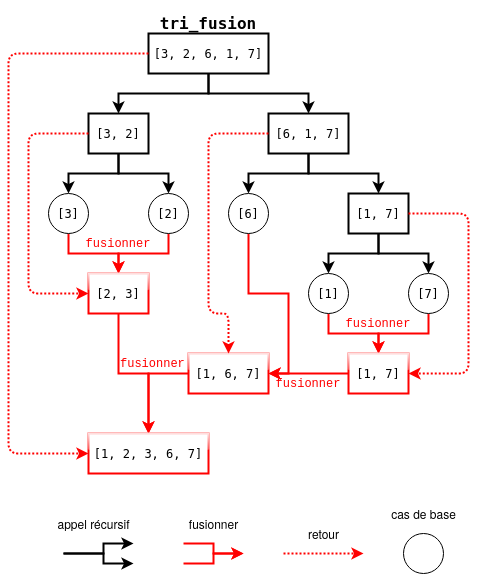</center>

Implémenter `tri_fusion(nbs)`

In [ ]:
def tri_fusion(nbs):
    # votre code ici

In [ ]:
from random import randint
tri_fusion([randint(1, 100) for i in range(10)])

**Solution**

In [ ]:
def tri_fusion(nbs):
    N = len(nbs)
    if N == 1: return nbs
    m = N // 2
    return fusionner(
        tri_fusion(nbs[:m]),
        tri_fusion(nbs[m:])
    )      

***